In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Extracción de csv a dataframe mediante pandas
cashrequest=pd.read_csv(r'.\project_dataset/extract - cash request - data analyst.csv')
x=cashrequest

# 1. Análisis de la Calidad de Datos

In [3]:
# Análisis de calidad de la base de datos
print("TOTAL NUMBER OF ROWS: ",len(x),"\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n")
print("NUMBER OF UNIQUE VALUES:",x.nunique(),"\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
print("NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES:",round((x.nunique()/len(x)*100),2),"%\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
print("% OF NAN VALUES IS: ",round(100*(x.isnull().sum() / len(x)),2),"%\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")

TOTAL NUMBER OF ROWS:  23970 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

NUMBER OF UNIQUE VALUES: id                            23970
amount                           41
status                            7
created_at                    23970
updated_at                    23970
user_id                       10798
moderated_at                  16035
deleted_account_id             1141
reimbursement_date             4089
cash_request_received_date      312
money_back_date               12221
transfer_type                     2
send_at                       16641
recovery_status                   4
reco_creation                  3330
reco_last_update               3330
dtype: int64 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES: id                            100.00
amount                          0.17
status                          0.03
created_at                    100.00
updat

### 1.1 DataQuality Resumen CRs

Columnas con alta calidad:
Columnas como id, created_at, updated_at, user_id parecen tener alta calidad debido a su buena proporción de valores únicos y ausencia o bajo porcentaje de valores faltantes.

Columnas con posibles problemas de calidad:
Las columnas recovery_status, reco_creation y deleted_account_id presentan un alto porcentaje de valores faltantes, lo que disminuye su valor para el análisis.
amount y status muestran baja variabilidad, lo que puede limitar el alcance de análisis descriptivos o predictivos que se basen en estas variables.

Impacto de los valores faltantes:
Columnas clave con valores faltantes como moderated_at o money_back_date pueden impactar la capacidad de analizar cuándo y por qué ocurren ciertos eventos financieros o moderaciones. La imputación o el manejo adecuado de estos datos será crucial para mejorar el análisis.

In [4]:
# Extracción de csv a dataframe mediante pandas
feesDf=pd.read_csv(r'.\project_dataset/extract - fees - data analyst - .csv')
x=feesDf

In [5]:
# Análisis de calidad de la base de datos
print("TOTAL NUMBER OF ROWS: ",len(x),"\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n")
print("NUMBER OF UNIQUE VALUES:",x.nunique(),"\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
print("NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES:",round((x.nunique()/len(x)*100),2),"%\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")
print("% OF NAN VALUES IS: ",round(100*(x.isnull().sum() / len(x)),2),"%\n")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - \n")

TOTAL NUMBER OF ROWS:  21061 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

NUMBER OF UNIQUE VALUES: id                 21061
cash_request_id    12933
type                   3
status                 4
category               2
total_amount           2
reason             15149
created_at         21026
updated_at         21061
paid_at            15529
from_date           1084
to_date             1560
charge_moment          2
dtype: int64 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

NUMBER OF UNIQUE VALUES DIVIDED BY TOTAL VALUES: id                 100.00
cash_request_id     61.41
type                 0.01
status               0.02
category             0.01
total_amount         0.01
reason              71.93
created_at          99.83
updated_at         100.00
paid_at             73.73
from_date            5.15
to_date              7.41
charge_moment        0.01
dtype: float64 %

- - - - - - - - - - - - - - - - - - - - - - - - 

### 1.2 DataQuality Resumen Fees

Columnas con buena calidad:
id, updated_at, reason, created_at: Estas columnas tienen un 100% de completitud y suficiente variabilidad, lo que indica alta calidad para el análisis.

Columnas con problemas de calidad:
category: Es la columna más problemática, con un 89.57% de valores faltantes. Dado que tiene solo dos categorías, su utilidad es limitada y podría no aportar valor si no se aborda el problema de los valores faltantes.
from_date y to_date: Al tener más del 60% de valores faltantes, pueden representar un problema si se necesita analizar períodos específicos.

Columnas con variabilidad limitada:
total_amount y charge_moment: Estas columnas tienen solo 2 valores únicos, lo que limita su valor para análisis descriptivos detallados, pero pueden ser útiles en clasificaciones binarias o en contextos de reglas de negocio.

Impacto de los valores faltantes:
paid_at: El 26.26% de valores faltantes en esta columna sugiere que no todas las solicitudes se han pagado o registrado adecuadamente. Este campo es crucial para cualquier análisis financiero, y los valores faltantes deberían tratarse para evitar sesgos en el análisis.

## 2. Análisis Exploratorio de Datos (EDA)

In [6]:
# Fase de reconocimiento de bases de datos entregadas por el cliente
# Apertura y lectura del excel que dispone de una leyenda de conceptos que encontraremos en los csv.

lexique_excel_CR=pd.read_excel(r'.\project_dataset/Lexique - Data Analyst.xlsx', sheet_name="context - cash request")
lexique_excel_Fee=pd.read_excel(r'.\project_dataset/Lexique - Data Analyst.xlsx', sheet_name="context - fees")

lexique_excel=[lexique_excel_CR, lexique_excel_Fee]
for hoja in lexique_excel:
    for i in range(18):
        print(f"{i} {hoja["Column name"][i]}:",hoja.Description[i])
        print("\n")

0 id: Unique ID of Cash Request


1 amount: Amount of the Cash Request


2 status: Status of the CR.
Possibles values are : 
- approved : CR is a 'regular' one (= without fees) and was approved either automatically or manually. Funds will be sent aprox. 7 days after the creation
- money_sent : We transferred the fund to the customer account. Will change to active once we detect that the user received the funds (using user's bank history)
- rejected : The CR needed a manual review and was rejected
- pending : The CR is pending a manual review from an analyst
- transaction_declined : We failed to send the funds to the customer
- waiting_user_confirmation : The user needs to confirm in-app that he want the CR (for legal reasons)
- direct_debit_rejected : Our last attempt of SEPA direct debit to charge the customer was rejected 
- canceled : The user didn't confirm the cash request in-app, we automatically canceled it
- direct_debit_sent : We sent/scheduled a SEPA direct debit to charge th

In [7]:
# Crear una columna que contenga la fecha 
# Cambio a formato fecha de la columna created_at en formato cohorte
cashrequest['created_at'] = pd.to_datetime(cashrequest['created_at'])
cashrequest['date'] = cashrequest['created_at'].dt.strftime('%Y/%m')

# Impresión para comprobar el funcionamiento
print(cashrequest['date'])

0        2019/12
1        2019/12
2        2019/12
3        2019/12
4        2020/05
          ...   
23965    2020/10
23966    2020/10
23967    2020/10
23968    2020/10
23969    2020/10
Name: date, Length: 23970, dtype: object


In [8]:
# Tratamos de tener en cuenta la creación de nuevos usuarios aunque hayan sido eliminados, pero si queremos hacer el análisis con los usuarios activos únicamente lo dejamos comentado este paso
# Atención, si cambias all_user_id, se requiere de modificar en las 4 siguientes líneas
cashrequest['all_user_id']=cashrequest['user_id'].fillna(cashrequest['deleted_account_id'])
#print(cashrequest['all_user_id'])

# Sort by 'user_id' and 'created_at'
cashrequest = cashrequest.sort_values(by=['all_user_id', 'created_at'])

# Group by 'user_id' and get the minimum 'date' for each user
cohort = cashrequest.groupby('all_user_id')['date'].min().reset_index()

# Rename 'date' to 'cohort' to reflect the cohort date
cohort = cohort.rename(columns={'date': 'cohort'})

# Merge the cohort information back into the original DataFrame
cashrequest = pd.merge(cashrequest, cohort, on='all_user_id')

C:\Users\smont\AppData\Local\Temp\ipykernel_15748\3643995587.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cashrequest['date']=pd.to_datetime(cashrequest['date'])


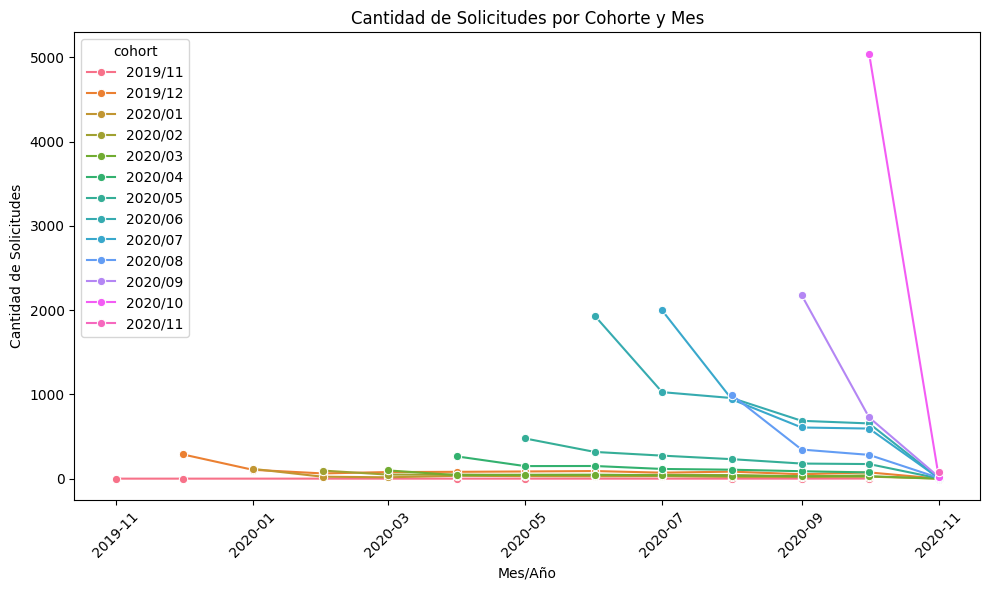

In [9]:
cashrequest['date']=pd.to_datetime(cashrequest['date'])

CRcount_1 = cashrequest.groupby(['cohort', 'date']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.lineplot(data=CRcount_1, x="date", y="count", hue="cohort", marker='o')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para que se vean mejor
plt.xlabel('Mes/Año')
plt.ylabel('Cantidad de Solicitudes')
plt.title('Cantidad de Solicitudes por Cohorte y Mes')
plt.tight_layout()
#plt.ylim(0, 1000)
plt.show()

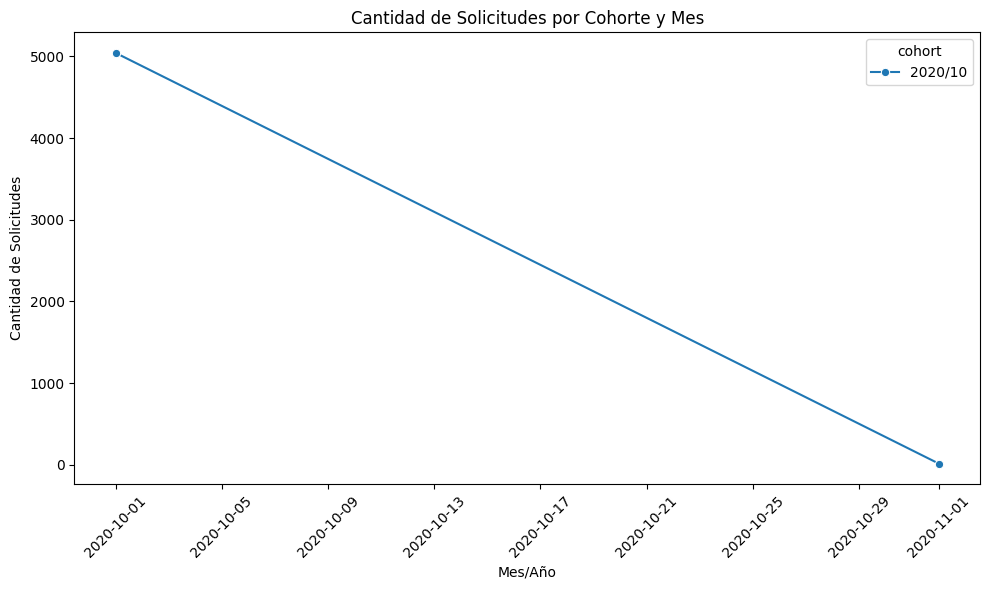

In [10]:
# Hacemos un filtro para ver el último cohorte
filtered_cr = cashrequest[cashrequest['cohort'] == '2020/10']
filtered_cr
cashrequest['date']=pd.to_datetime(cashrequest['date'])
CRcount = filtered_cr.groupby(['cohort', 'date']).size().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.lineplot(data=CRcount, x="date", y="count", hue="cohort", marker='o')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para que se vean mejor
plt.xlabel('Mes/Año')
plt.ylabel('Cantidad de Solicitudes')
plt.title('Cantidad de Solicitudes por Cohorte y Mes')
plt.tight_layout()
plt.show()

In [11]:
# Creamos una tabla para identificar si los valores graficados se corresponden con la realidad

cohorttest = cashrequest.groupby('date')['all_user_id'].count().reset_index()
cohorttest

,date,all_user_id
0,2019-11-01,1
1,2019-12-01,289
2,2020-01-01,223
3,2020-02-01,184
4,2020-03-01,244
5,2020-04-01,473
6,2020-05-01,837
7,2020-06-01,2615
8,2020-07-01,3601
9,2020-08-01,3417


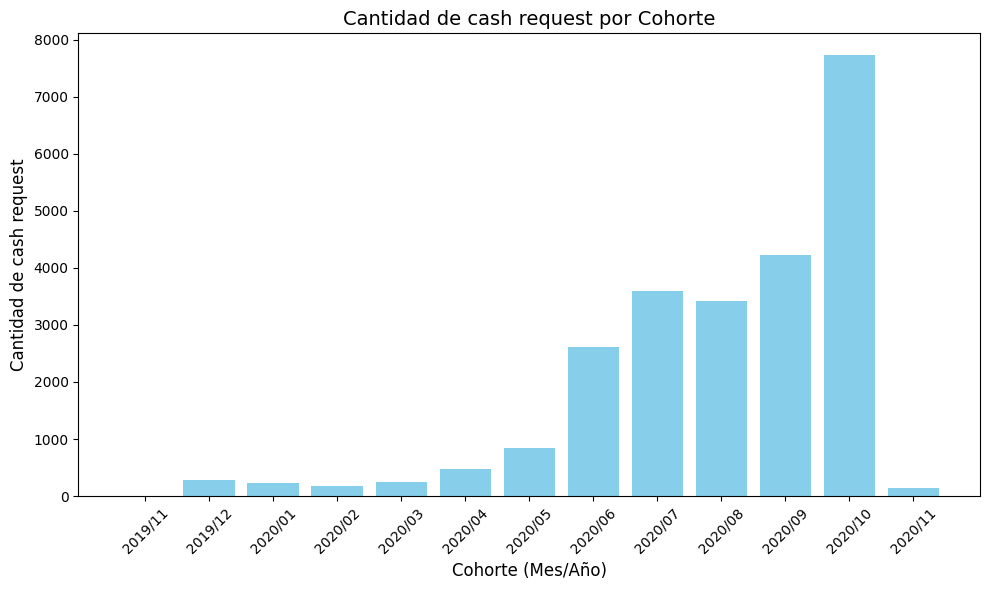

In [12]:
# Agrupar por 'cohort' y contar las filas para cada cohorte
cashrequest['date'] = cashrequest['created_at'].dt.strftime('%Y/%m')
cohort_counts = cashrequest.groupby('date').size()
# Graficar el histograma
plt.figure(figsize=(10, 6))
plt.bar(cohort_counts.index, cohort_counts.values, color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Cohorte (Mes/Año)', fontsize=12)
plt.ylabel('Cantidad de cash request', fontsize=12)
plt.title('Cantidad de cash request por Cohorte', fontsize=14)

# Girar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)

# Ajustar el diseño y mostrar gráfico
plt.tight_layout()
plt.show()

In [13]:
# Definir una función para clasificar el estado para estudiar la tasa de CR ok
def classify_status(status):
    ok_statuses = ['approved', 'money_sent', 'active', 'money_back']
    if status in ok_statuses:
        return 'ok'
    else:
        return 'ko'


# Aplicar la función a la columna 'status' para crear una nueva columna 'status_classified'
cashrequest['status_classified'] = cashrequest['status'].apply(classify_status)
# Mostrar las primeras filas del DataFrame actualizado
cashrequest.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,date,all_user_id,cohort,status_classified
0,1302,100.0,rejected,2020-04-20 15:50:21.187257+00:00,2020-04-22 12:03:34.439811+00,34.0,2020-04-22 12:03:34.434712+00,NaN,2020-04-27 15:50:21.18689+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020/04,34.0,2020/04,ko
1,150,100.0,rejected,2019-12-13 20:27:38.106778+00:00,2019-12-18 15:20:41.722482+00,35.0,2019-12-18 15:20:41.715612+00,NaN,2019-12-20 20:27:38.106319+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019/12,35.0,2019/12,ko
2,326,90.0,rejected,2019-12-28 04:00:22.349592+00:00,2019-12-29 10:17:28.378732+00,35.0,2019-12-29 10:17:28.371177+00,NaN,2020-01-04 04:00:22.34903+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2019/12,35.0,2019/12,ko
3,510,90.0,rejected,2020-01-27 19:50:46.387431+00:00,2020-01-28 14:52:30.164273+00,35.0,2020-01-28 14:52:30.160427+00,NaN,2020-02-03 19:50:46.387008+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020/01,35.0,2019/12,ko
4,758,90.0,rejected,2020-02-28 10:51:11.440880+00:00,2020-02-28 14:13:21.50435+00,35.0,2020-02-28 14:13:21.501335+00,NaN,2020-03-07 23:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,2020/02,35.0,2019/12,ko


In [14]:
cohortes_okko = pd.DataFrame(cashrequest.groupby(["cohort", "status_classified"])["status_classified"].count()).unstack()
cohortes_okko


# Aplicar la función a la columna 'status' para crear una nueva columna 'status_classified'
cohortes_okko['tasa_ko'] = (cohortes_okko["status_classified"]['ko']/(cohortes_okko["status_classified"]['ko']+cohortes_okko["status_classified"]['ok']))
cohortes_okko

# Limpiar nombre de index stacked
cohortes_okko.reset_index(inplace=True)
print(cohortes_okko.columns)

MultiIndex([(           'cohort',   ''),
            ('status_classified', 'ko'),
            ('status_classified', 'ok'),
            (          'tasa_ko',   '')],
           names=[None, 'status_classified'])


MultiIndex([(           'cohort',   ''),
            ('status_classified', 'ko'),
            ('status_classified', 'ok'),
            (          'tasa_ko',   '')],
           names=[None, 'status_classified'])


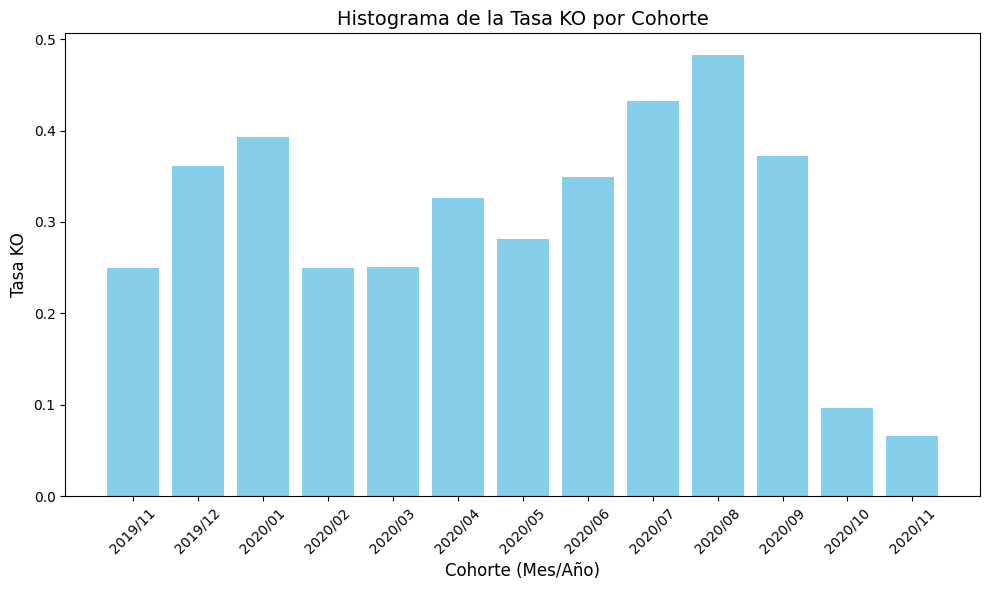

In [15]:
# # Limpiar nombre de index stacked
#cohortes_okko.reset_index(inplace=True)
print(cohortes_okko.columns)

# Graficar el histograma
plt.figure(figsize=(10, 6))
plt.bar(cohortes_okko[(           'cohort',   '')], cohortes_okko[(          'tasa_ko',   '')], color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Cohorte (Mes/Año)', fontsize=12)
plt.ylabel('Tasa KO', fontsize=12)
plt.title('Histograma de la Tasa KO por Cohorte', fontsize=14)

# Girar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)

# Ajustar el diseño y mostrar gráfico
plt.tight_layout()
plt.show()

In [16]:
# Juntamos la información de Cash Request con las comisiones para hacer estudio según cohortes en comisiones
feesDf_copy=feesDf
print(feesDf_copy.columns)
feesDf_copy.info()
cashrequest_renombrado = cashrequest.rename(columns={'id': 'cash_request_id'})
cashrequest_renombrado.head()
cashrequest_renombrado.info()
print(cashrequest_renombrado.columns)

#fees_alluser=  feesDf_copy.merge( cashrequest_renombrado['cohort'], on='cash_request_id', how='left')
# Merge para agregar la columna 'Nombre' de df_a a df_b
feesDf_copy_combined = feesDf_copy.merge(cashrequest_renombrado[['cash_request_id', 'cohort', 'all_user_id']], on='cash_request_id', how='left')
feesDf_copy_combined.head()

Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  obje

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,cohort,all_user_id
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after,2020/09,35661.0
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after,2020/06,16158.0
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after,2020/10,81575.0
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after,2020/10,94393.0
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after,2020/06,19005.0


In [17]:
# Consultamos para identificar que el merge ha sido correcto
feesDf_copy_combined[feesDf_copy_combined['cash_request_id']==19350]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,cohort,all_user_id
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after,2020/06,19005.0
8138,17233,19350.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-24 22:43:13.282681+00,2020-10-24 22:43:13.282706+00,2020-11-02 14:45:20.380563+00,NaN,NaN,after,2020/06,19005.0


In [18]:
cashrequest_renombrado[cashrequest_renombrado['cash_request_id']==19350]

,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,date,all_user_id,cohort,status_classified
10817,19350,50.0,money_back,2020-10-06 00:40:24.008752+00:00,2020-12-18 13:12:59.891993+00,NaN,2020-10-06 08:20:15.587318+00,19005.0,2020-10-30 11:00:00+00,2020-10-09,2020-11-02 14:45:20.315696+00,instant,2020-10-13 00:40:23.983346+00,completed,2020-10-24 22:43:13.278707+00,2020-11-02 14:45:20.333109+00,2020/10,19005.0,2020/06,ok


Index(['id', 'cash_request_id', 'type', 'status', 'category', 'total_amount',
       'reason', 'created_at', 'updated_at', 'paid_at', 'from_date', 'to_date',
       'charge_moment', 'cohort', 'all_user_id'],
      dtype='object')


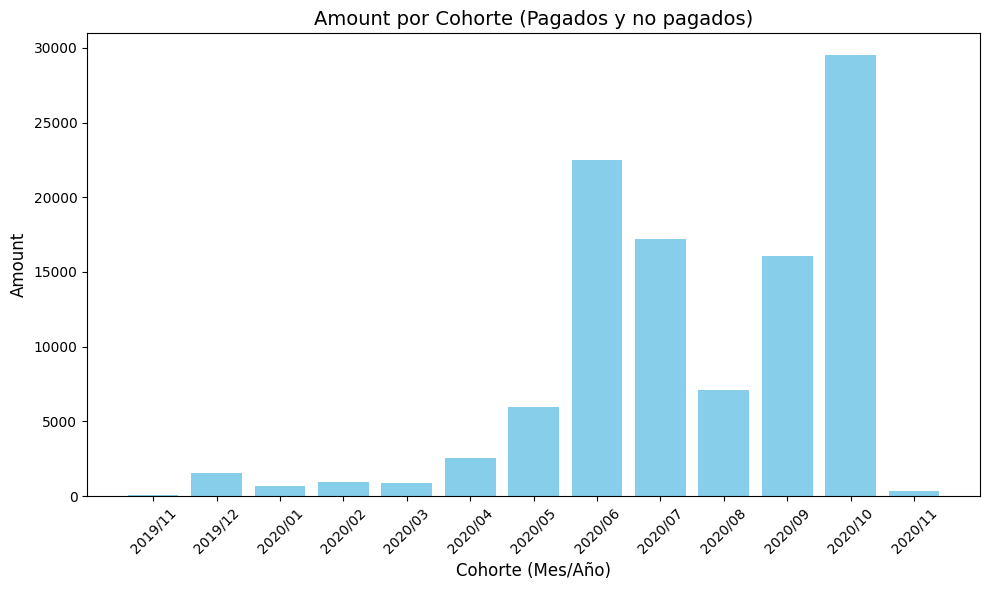

In [19]:
# Tomamos los ingresos realizados por cohorte según la base de datos, primero OK y NOK y después solo los OK
print(feesDf_copy_combined.columns)
# Transferencias tanto OK como NOK


# Graficar el histograma
plt.figure(figsize=(10, 6))

suma_ingresos = pd.DataFrame(feesDf_copy_combined.groupby("cohort")["total_amount"].sum()).reset_index()
plt.bar(suma_ingresos['cohort'], suma_ingresos['total_amount'], color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Cohorte (Mes/Año)', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Amount por Cohorte (Pagados y no pagados)', fontsize=14)

# Girar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)

# Ajustar el diseño y mostrar gráfico
plt.tight_layout()
plt.show()

In [20]:
# Limpiamos los que son NOK mediante el uso único de los pagos ya realizados
feesDf_copy_paid=feesDf_copy_combined.dropna(subset=['paid_at'], inplace=False)
print(feesDf_copy_paid)
feesDf_copy_paid.info()

          id  cash_request_id             type    status  \
0       6537          14941.0  instant_payment  rejected   
1       6961          11714.0         incident  accepted   
2      16296          23371.0  instant_payment  accepted   
3      20775          26772.0  instant_payment  accepted   
4      11242          19350.0  instant_payment  accepted   
...      ...              ...              ...       ...   
21056  12372          20262.0  instant_payment  rejected   
21057  20768          26764.0  instant_payment  rejected   
21058  18779          25331.0  instant_payment  rejected   
21059  16542          23628.0  instant_payment  rejected   
21060  13301          20982.0  instant_payment  accepted   

                    category  total_amount  \
0                        NaN           5.0   
1      rejected_direct_debit           5.0   
2                        NaN           5.0   
3                        NaN           5.0   
4                        NaN           5.0   
...

     cohort  total_amount
0   2019/11          30.0
1   2019/12        1090.0
2   2020/01         460.0
3   2020/02         620.0
4   2020/03         620.0
5   2020/04        1670.0
6   2020/05        3785.0
7   2020/06       14475.0
8   2020/07       11845.0
9   2020/08        5390.0
10  2020/09       12200.0
11  2020/10       25140.0
12  2020/11         335.0


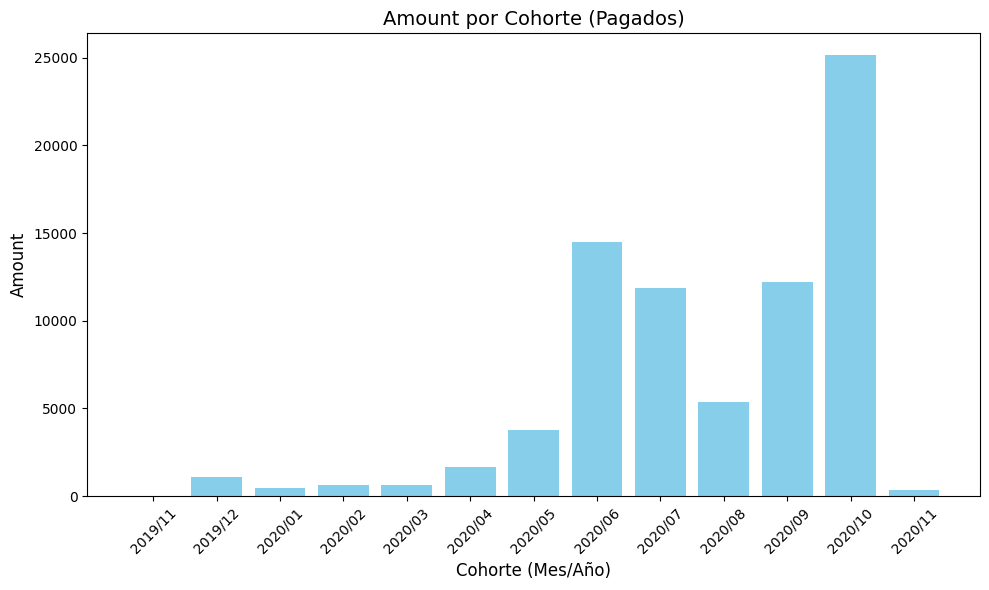

In [21]:
# Graficar el histograma
# Transferencias solo de pagos realizados

plt.figure(figsize=(10, 6))

suma_ingresos = pd.DataFrame(feesDf_copy_paid.groupby("cohort")["total_amount"].sum()).reset_index()
print(suma_ingresos)
plt.bar(suma_ingresos['cohort'], suma_ingresos['total_amount'], color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Cohorte (Mes/Año)', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Amount por Cohorte (Pagados)', fontsize=14)

# Girar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)

# Ajustar el diseño y mostrar gráfico
plt.tight_layout()
plt.show()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que feesDf_copy_combined es tu DataFrame original
# Crear una nueva columna 'status' basada en 'paid_at'
feesDf_copy_combined1['status'] = feesDf_copy_combined['paid_at'].apply(
    lambda x: 'Paid' if pd.notna(x) and x != '' else 'Not Paid'
)

# Agrupar los datos por cohorte y nuevo status para obtener las sumas de total_amount
suma_ingresos_status = pd.DataFrame(feesDf_copy_combined1.groupby(['cohort', 'status'])['total_amount'].sum()).reset_index()

# Pivotar los datos para obtener 'Paid' y 'Not Paid' como columnas separadas
suma_ingresos_pivot = suma_ingresos_status.pivot(index='cohort', columns='status', values='total_amount').fillna(0)

# Crear el gráfico de barras apiladas
plt.figure(figsize=(10, 6))

# Graficar las barras para 'Paid' primero (debajo)
paid_bars = plt.bar(suma_ingresos_pivot.index, suma_ingresos_pivot['Paid'], color='lightcoral', label='Paid')

# Graficar las barras para 'Not Paid', apilando sobre 'Paid'
not_paid_bars = plt.bar(suma_ingresos_pivot.index, suma_ingresos_pivot['Not Paid'], color='skyblue', label='Not Paid', bottom=suma_ingresos_pivot['Paid'])

# Añadir etiquetas a las barras de 'Paid'
for bar in paid_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Añadir etiquetas a las barras de 'Not Paid'
for bar in not_paid_bars:
    yval = bar.get_height() + bar.get_y()  # yval debe ser la altura acumulada
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(bar.get_height()), ha='center', va='bottom', fontsize=10)

# Configurar etiquetas y título
plt.xlabel('Cohorte (Mes/Año)', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.title('Amount por Cohorte (Pagados y No Pagados)', fontsize=14)

# Girar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Ajustar el diseño y mostrar gráfico
plt.tight_layout()
plt.show()

NameError: name 'feesDf_copy_combined1' is not defined

In [ ]:
# Graficamos mediante lineplot para tener otra visión
CRcount = suma_ingresos
print(CRcount.columns)
plt.figure(figsize=(10, 6))
sns.lineplot(data=CRcount, x="cohort", y="total_amount", marker='o')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para que se vean mejor
plt.xlabel('Mes/Año')
plt.ylabel('Cantidad de Solicitudes')
plt.title('Cantidad de Solicitudes por Cohorte y Mes')
plt.tight_layout()
#plt.ylim(0, 1000)
plt.show()

In [ ]:
# Visualizamos el anterior gráfico pero desagrupado por cohortes
#Cambio a formato fecha
feesDf_copy_combined['paid_at'] = pd.to_datetime(feesDf_copy_combined['paid_at'],format='mixed')

# Formatear la columna 'paid_at' como 'YYYY/MM'
feesDf_copy_combined['paid_at'] = feesDf_copy_combined['paid_at'].dt.strftime('%Y/%m')

pivotcohort = pd.pivot_table(feesDf_copy_combined,index='cohort', columns='paid_at', values='total_amount', aggfunc='sum')

pivotcohort.fillna(0, inplace=True)
print(pivotcohort)

# Crear una gráfica de barras a partir de la tabla dinámica
pivotcohort.plot(kind='line')

# Añadir etiquetas y título
plt.title('Ingresos Generados por la Cohorte')
plt.xlabel('Año/Mes')
plt.ylabel('Ingresos')
plt.legend(title='Cohorte')

# Mostrar el gráfico
plt.show()

In [ ]:
# Juntando los gráficos
# Create subplots with 1 row and 3 columns, and set the figure size
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

pivotcohort.plot(kind='line', ax=axs[0])
# Rotar los textos del eje X en el primer gráfico
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].set_title("Ingresos Generados por la Cohorte")

sns.lineplot(data=CRcount, x="cohort", y="total_amount", marker='o', ax=axs[1])
# Rotar los textos del eje X
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45) 
axs[1].set_title("Cantidad de Solicitudes por Cohorte y Mes")

plt.bar(suma_ingresos['cohort'], suma_ingresos['total_amount'], color='skyblue')
plt.xticks(rotation=45) 
axs[2].set_title("Amount por Cohorte")

plt.show()

In [ ]:
# Analizamos el tipo de pago de Cash Request que desean los cohortes y el volumen que va ganando de pagos instantáneos frente a pagos con fecha regular

tipotranfer = pd.DataFrame(cashrequest.groupby(["cohort", "transfer_type",])["transfer_type"].count()).unstack()
tipotranfer.head(12)
tipotranfer.plot(kind="bar",label="Evolución tipo de CR")

# Cambiar el nombre del eje X e Y
plt.xlabel("Cohortes")
plt.ylabel("Volumen CRs")

plt.xticks(rotation=45)
# Crear la leyenda
legend = plt.legend()

# Asignar un título a la leyenda
legend.set_title("Tipo de transferencia")
plt.legend(labels=['Instant','Regular'])
plt.title('Instant vs Regular', fontsize=14)

plt.show()

In [ ]:
# Analizamos el tipo de pago de Cash Request que desean los cohortes y el volumen que va ganando de pagos instantáneos frente a pagos con fecha regular

tipotranfer = pd.DataFrame(cashrequest.groupby(["date", "transfer_type",])["transfer_type"].count()).unstack()
tipotranfer.head(12)
tipotranfer.plot(kind="bar",label="Evolución tipo de CR")

# Cambiar el nombre del eje X e Y
plt.xlabel("Dates")
plt.ylabel("Volumen CRs")

plt.xticks(rotation=45)
# Crear la leyenda
legend = plt.legend()

# Asignar un título a la leyenda
legend.set_title("Tipo de transferencia")
plt.legend(labels=['Instant','Regular'])

plt.title('Instant vs Regular', fontsize=14)

plt.show()

In [ ]:
copiaFees=feesDf

copiaFees['created_at'] = pd.to_datetime(copiaFees['created_at'])
copiaFees['date'] = copiaFees['created_at'].dt.strftime('%Y/%m')

totalFees = copiaFees['type'].count()
print(totalFees)

filtered_copiaFees = copiaFees[copiaFees['type'] == 'instant_payment']
filtered_copiaFees = filtered_copiaFees[filtered_copiaFees['status'] == 'accepted']

instantFees = filtered_copiaFees['type'].count()
print(instantFees)

agrupadoFeeTotal=copiaFees.groupby('date')['type'].count().reset_index(name='count_type_copiaFees')
print(copiaFees.groupby('date')['type'].count())

agrupadoFeeInstant=filtered_copiaFees.groupby('date')['type'].count().reset_index(name='count_type_filtered')
print(filtered_copiaFees.groupby('date')['type'].count())

dfFeeInstant = pd.merge(agrupadoFeeTotal, agrupadoFeeInstant, on='date', how='left')
dfFeeInstant.fillna(0, inplace=True)

dfFeeInstant['tasa_instant']=dfFeeInstant['count_type_filtered']/dfFeeInstant['count_type_copiaFees']
print(dfFeeInstant)


plt.bar(dfFeeInstant['date'], dfFeeInstant['tasa_instant'], color='skyblue')

 # Configurar etiquetas y título
plt.xlabel('Mes/Año', fontsize=12)
plt.ylabel('Tasa de Fee instantáneos aceptados', fontsize=12)
plt.title('Evolución tasa de Fee instantáneos aceptados', fontsize=14)

# Girar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)

# Ajustar el diseño y mostrar gráfico
plt.tight_layout()
plt.show()

In [ ]:
copiaFees=feesDf

copiaFees['created_at'] = pd.to_datetime(copiaFees['created_at'])
copiaFees['date'] = copiaFees['created_at'].dt.strftime('%Y/%m')

totalFees = copiaFees['type'].count()
print(totalFees)

filtered_copiaFees = copiaFees[copiaFees['type'] == 'postpone']
filtered_copiaFees = filtered_copiaFees[filtered_copiaFees['status'] == 'accepted']

instantFees = filtered_copiaFees['type'].count()
print(instantFees)

agrupadoFeeTotal=copiaFees.groupby('date')['type'].count().reset_index(name='count_type_copiaFees')
print(copiaFees.groupby('date')['type'].count())

agrupadoFeeInstant=filtered_copiaFees.groupby('date')['type'].count().reset_index(name='count_type_filtered')
print(filtered_copiaFees.groupby('date')['type'].count())

dfFeeInstant = pd.merge(agrupadoFeeTotal, agrupadoFeeInstant, on='date', how='left')
dfFeeInstant.fillna(0, inplace=True)

dfFeeInstant['tasa_instant']=dfFeeInstant['count_type_filtered']/dfFeeInstant['count_type_copiaFees']
print(dfFeeInstant)


plt.bar(dfFeeInstant['date'], dfFeeInstant['tasa_instant'], color='skyblue')

 # Configurar etiquetas y título
plt.xlabel('Mes/Año', fontsize=12)
plt.ylabel('Tasa de Fee pospuestos', fontsize=12)
plt.title('Evolución tasa de Fee pospuestos', fontsize=14)

# Girar etiquetas del eje X para mejor visibilidad
plt.xticks(rotation=45)

# Ajustar el diseño y mostrar gráfico
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation
data = {
    "date": [
         "2020-07-01", 
        "2020-08-01", "2020-09-01", "2020-10-01", "2020-11-01"
    ],
    "Total": [ 1619, 3052, 4572, 10776, 267],
    "Instant": [ 100.0, 1515.0, 2539.0, 6824.0, 121.0],
    "Accepted": [ 94.0, 1414.0, 2381.0, 6298.0, 109.0],
    "Cancelled": [ 1.0, 19.0, 4.0, 35.0, 2.0],
    "Confirmed": [ 0.0, 0.0, 6.0, 62.0, 1.0],
    "Rejected": [ 5.0, 82.0, 148.0, 429.0, 9.0],
    "%Accepted": [ 94.0, 93.333333, 93.777078, 92.291911, 90.082645],
    "%Cancelled": [ 1, 1.254125, 0.157542, 0.512896, 1.652893],
    "%Confirmed": [ 0.0, 0.0,0.236314, 0.908558, 0.826446],
    "%Rejected": [ 5.0, 5.412514, 5.829067, 6.286635, 7.438017],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert the 'date' column to datetime and format it to year-month
df['date'] = pd.to_datetime(df['date']).dt.to_period('M')

# Prepare the data for plotting, excluding the first two columns
plot_data = df.set_index('date')[['%Accepted', '%Cancelled', '%Confirmed', '%Rejected']].fillna(0)

# Normalize to get percentage values for each month
plot_data_normalized = plot_data.div(plot_data.sum(axis=1), axis=0)

# Plotting
ax = plot_data_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), alpha=0.7)

# Set labels and title
ax.set_ylabel("Percentage")
ax.set_title("100% Stacked Distribution of Acceptance, Cancellation, Confirmation, and Rejection Over Time")
ax.set_xlabel("Date")
plt.xticks(rotation=45)

# Adjusting legend position
ax.legend(title="Status", loc='upper left', bbox_to_anchor=(1, 1))  # Legend to the right

# Adding labels inside the bars with black color
for i in range(len(plot_data_normalized)):
    for j in range(len(plot_data_normalized.columns)):
        value = plot_data_normalized.iloc[i, j]
        # Calculate the position of the label
        if j == 0:
            y_position = value / 2  # Middle of the first section
        else:
            y_position = plot_data_normalized.iloc[i, :j+1].sum() - value / 2  # Middle of the current section

        ax.text(i, y_position, f'{value:.1%}', ha='center', va='center', color='black')  # Color set to black

plt.ylim(0, 1)  # Set y-limit to 1 for percentage representation
plt.tight_layout()

# Show plot
plt.show()

In [23]:
# Agrupar por 'cohort' y sumar la columna 'total_amount'
df_grouped = feesDf_copy_combined.groupby('cohort')['total_amount'].sum().reset_index()

# Mostrar el dataframe resultante
print(df_grouped)

# Crear una nueva columna que indica si el pago se ha realizado
feesDf_copy_combined['paid'] = feesDf_copy_combined['paid_at'].notna()

# Mostrar algunos registros para verificar
print(feesDf_copy_combined[['paid_at', 'paid']].head(10))

# Filtrar los datos para pagos realizados y no realizados
paid_df = feesDf_copy_combined[feesDf_copy_combined['paid']]
not_paid_df = feesDf_copy_combined[~feesDf_copy_combined['paid']]

# Mostrar las primeras filas de ambos dataframes para verificar
print("Pagados:")
print(paid_df.head())

print("\nNo Pagados:")
print(not_paid_df.head())

# Agrupar por 'cohort' y calcular las sumas para pagos realizados
paid_grouped = paid_df.groupby('cohort')['total_amount'].sum().reset_index(name='paid')

# Mostrar el resultado
print("Pagados agrupados:")
print(paid_grouped)

# Agrupar por 'cohort' y calcular las sumas para no pagos
not_paid_grouped = not_paid_df.groupby('cohort')['total_amount'].sum().reset_index(name='not_paid')

# Mostrar el resultado
print("No pagados agrupados:")
print(not_paid_grouped)

# Unir los dos dataframes en uno solo
df_grouped = pd.merge(paid_grouped, not_paid_grouped, on='cohort', how='outer')

# Mostrar el dataframe resultante
print("Dataframe combinado:")
print(df_grouped)

# Calcular la suma total_amount
df_grouped['total_amount_sum'] = df_grouped['paid'].fillna(0) + df_grouped['not_paid'].fillna(0)

# Mostrar el dataframe final
print("Dataframe final:")
print(df_grouped)

     cohort  total_amount
0   2019/11          50.0
1   2019/12        1555.0
2   2020/01         655.0
3   2020/02         965.0
4   2020/03         870.0
5   2020/04        2565.0
6   2020/05        5930.0
7   2020/06       22495.0
8   2020/07       17175.0
9   2020/08        7095.0
10  2020/09       16100.0
11  2020/10       29500.0
12  2020/11         335.0
                         paid_at   paid
0   2020-12-17 14:50:07.47011+00   True
1   2020-12-08 17:13:10.45908+00   True
2   2020-11-04 19:34:37.43291+00   True
3  2020-11-19 05:09:22.500223+00   True
4  2020-11-02 14:45:20.355598+00   True
5   2020-11-09 19:10:14.47407+00   True
6   2020-12-21 13:52:27.94128+00   True
7  2020-11-05 14:15:36.600041+00   True
8  2020-11-28 19:41:43.667114+00   True
9                            NaN  False
Pagados:
      id  cash_request_id             type    status               category  \
0   6537          14941.0  instant_payment  rejected                    NaN   
1   6961          11714.0    